In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes=True)

In [65]:
#load dataset from csv file and view header and first lines
#original as-loaded data is called dfraw
ccp = pd.read_csv('ccpd.csv')
print('Table of Combined Cycle Plant data')
ccp.head()

Table of Combined Cycle Plant data


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [66]:
ccp.info()
ccp.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE)  of the plant.

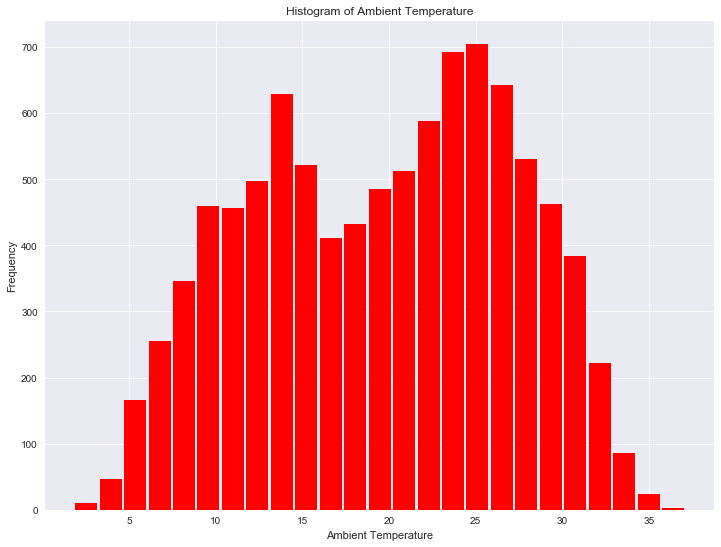

In [67]:
#Histogram of Ambient Temperature
plt.figure(figsize=(12,9))
ccp['AT'].plot.hist(grid=True, bins=25, rwidth=0.9,
                   color='red')
plt.title('Histogram of Ambient Temperature')
plt.xlabel('Ambient Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

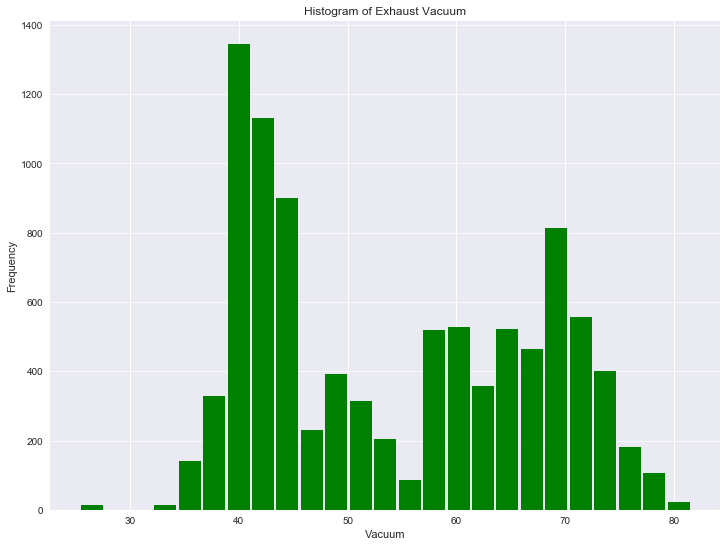

In [68]:
#Histogram of Ambient Temperature
plt.figure(figsize=(12,9))
ccp['V'].plot.hist(grid=True, bins=25, rwidth=0.9,
                   color='green')
plt.title('Histogram of Exhaust Vacuum')
plt.xlabel('Vacuum')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

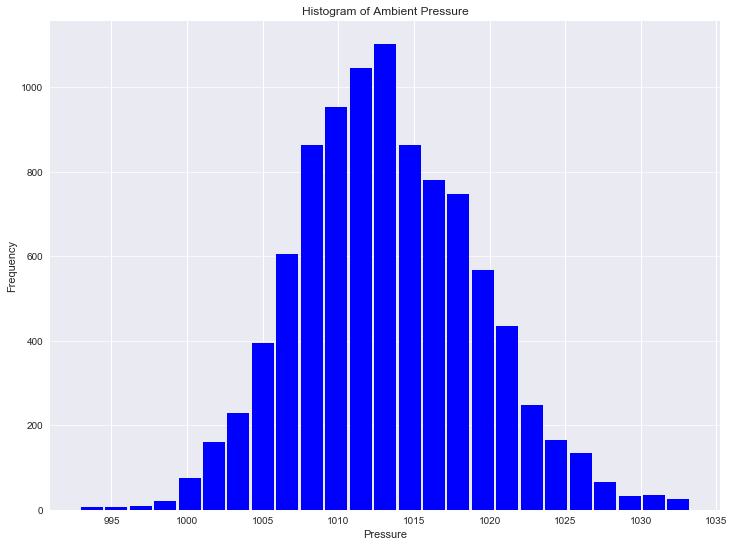

In [69]:
#Histogram of Ambient Temperature
plt.figure(figsize=(12,9))
ccp['AP'].plot.hist(grid=True, bins=25, rwidth=0.9,
                   color='blue')
plt.title('Histogram of Ambient Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

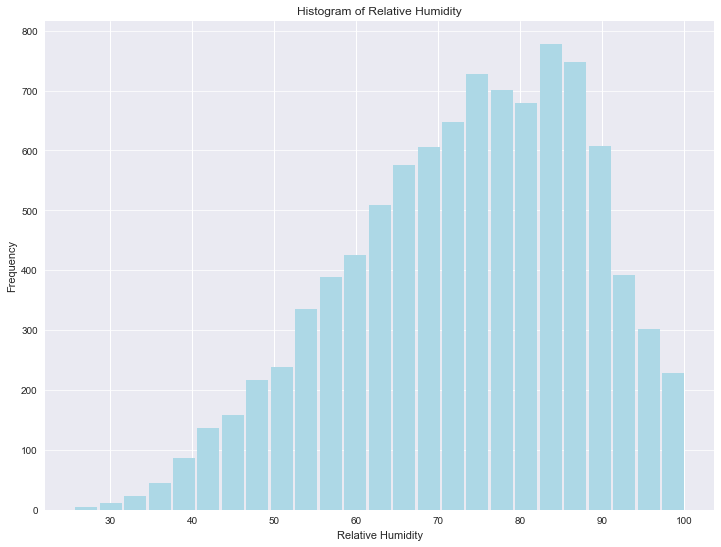

In [70]:
#Histogram of Ambient Temperature
plt.figure(figsize=(12,9))
ccp['RH'].plot.hist(grid=True, bins=25, rwidth=0.9,
                   color='lightblue')
plt.title('Histogram of Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

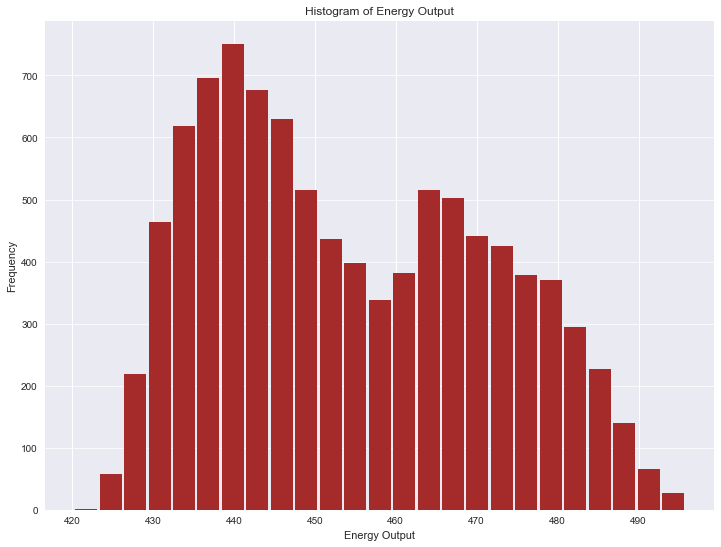

In [71]:
#Histogram of Ambient Temperature
plt.figure(figsize=(12,9))
ccp['PE'].plot.hist(grid=True, bins=25, rwidth=0.9,
                   color='brown')
plt.title('Histogram of Energy Output')
plt.xlabel('Energy Output')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [72]:
 corrmat = ccp.corr()
 print(corrmat)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


In [73]:
 covmat = ccp.cov()
 print (covmat)

            AT           V         AP          RH          PE
AT   55.539357   79.941324 -22.463437  -59.032171 -120.593715
V    79.941324  161.490544 -31.206771  -57.922808 -188.642778
AP  -22.463437  -31.206771  35.269152    8.633874   52.546510
RH  -59.032171  -57.922808   8.633874  213.167848   97.129952
PE -120.593715 -188.642778  52.546510   97.129952  291.282318


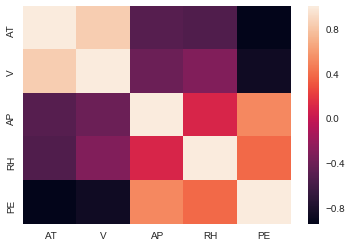

In [74]:
sns.heatmap(corrmat)

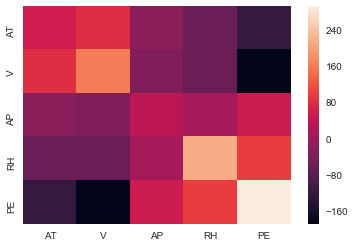

In [75]:
sns.heatmap(covmat)

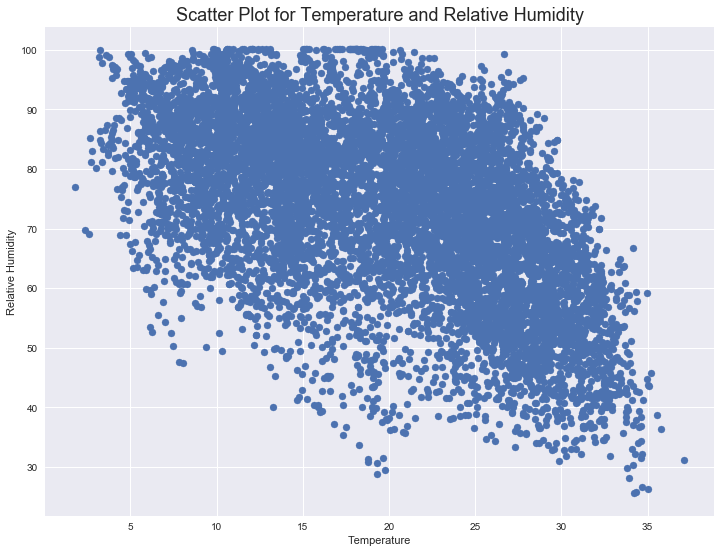

In [76]:
#Scatter plot showing loan amounts by age
plt.figure(figsize=(12,9))
temp=(ccp['AT'])
hum=(ccp['RH'])
plt.title('Scatter Plot for Temperature and Relative Humidity',fontsize=18)
plt.xlabel('Temperature')
plt.ylabel('Relative Humidity')
plt.scatter(temp,hum)
plt.show()

This plot shows very little, if any, real relationship between temperature and relative humidity.

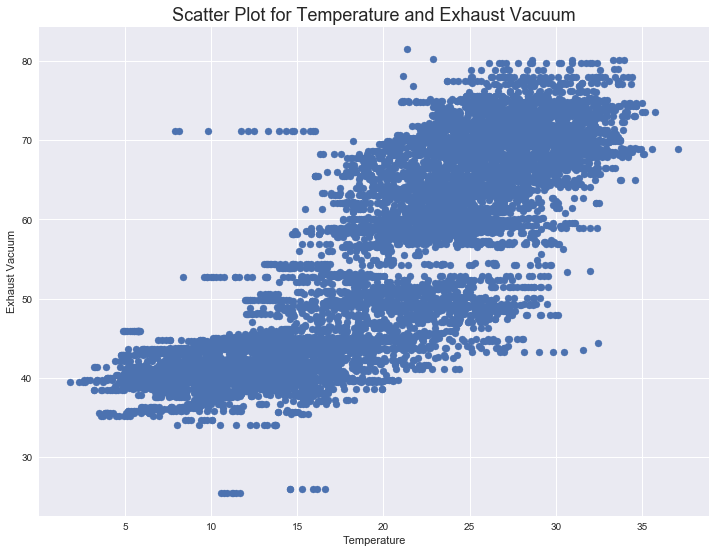

In [77]:
#Scatter plot showing loan amounts by age
plt.figure(figsize=(12,9))
temp=(ccp['AT'])
vac=(ccp['V'])
plt.title('Scatter Plot for Temperature and Exhaust Vacuum',fontsize=18)
plt.xlabel('Temperature')
plt.ylabel('Exhaust Vacuum')
plt.scatter(temp,vac)
plt.show()

The scatter plot for exhaust vacuum does show some relationship with temperature. There is, roughly speaking, a trend that with increasing temperature, exhaust vacuum too increases, but this is not a strong, linear relationship.

Create regression models to evaluate plant power output

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [80]:
#set dependent variable 
depVar = ccp['PE']

In [81]:
#define features
features = ccp.iloc[:,0:4]
features.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [82]:
#create training set
X_train = (features[:6698])
X_train.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [83]:
#Training set
y_train = depVar[:6698]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
print(y_train.head())

The number of observations in the Y training set are: 6698
0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64


In [84]:
#Test set
X_test = features[-2870:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 2870
         AT      V       AP     RH
6698  30.20  71.85  1008.25  59.10
6699  28.86  73.18  1012.46  68.80
6700  26.05  46.21  1011.31  55.25
6701  17.46  42.42  1008.97  69.19
6702  25.65  43.77  1011.65  46.18


In [85]:
#Ground truth
y_test = depVar[:-2870]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 6698


0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((5023, 4), (1675, 4))

In [116]:
#Define then run models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLM = linear_model.LinearRegression()
modelBR = linear_model.BayesianRidge()

In [88]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [94]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [95]:
modelLM.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
modelBR.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [97]:
#Calculate accuracy of models
print(cross_val_score(modelRF, X_train, y_train))

[0.95312768 0.95451868 0.95224573]


In [98]:
print(cross_val_score(modelSVR, X_train, y_train)) 

[0.20029642 0.218733   0.21619263]


In [99]:
#Model Fitting
modelRF.score(X_train,y_train)

0.9924782647239873

In [101]:
modelSVR.score(X_train,y_train)

0.38142377822295015

In [102]:
modelLM.score(X_train,y_train)

0.9340612712456003

In [103]:
modelBR.score(X_train,y_train)

0.9340612519018828

In [104]:
#Make Predictions
predictionsRF = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictionsRF)
rmse = sqrt(mean_squared_error(y_test, predictionsRF))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.944
RMSE: 3.966


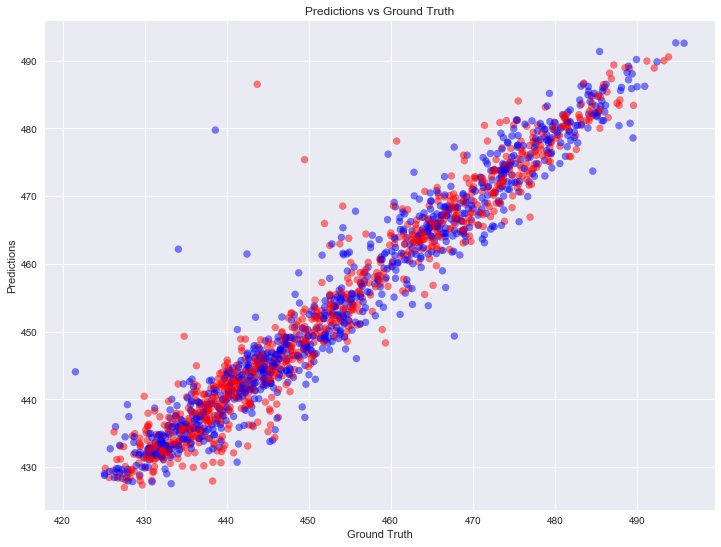

In [105]:
plt.figure(figsize=(12,9))
plt.scatter(y_test, predictionsRF, color=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.show()

In [106]:
#Make Predictions
predictionsSVR = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictionsSVR)
rmse = sqrt(mean_squared_error(y_test, predictionsSVR))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.311
RMSE: 13.947


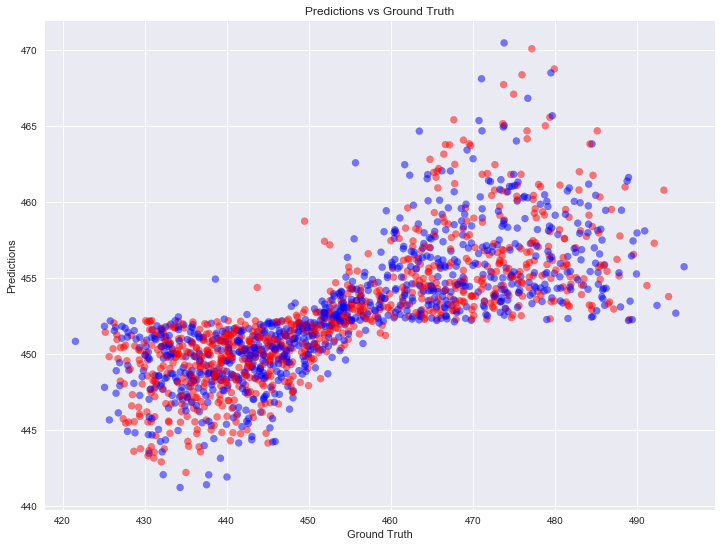

In [107]:
plt.figure(figsize=(12,9))
plt.scatter(y_test, predictionsSVR, color=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.show()

In [110]:
#Make Predictions
predictionsLM = modelLM.predict(X_test)
predRsquared = r2_score(y_test,predictionsRF)
rmse = sqrt(mean_squared_error(y_test, predictionsRF))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.920
RMSE: 4.767


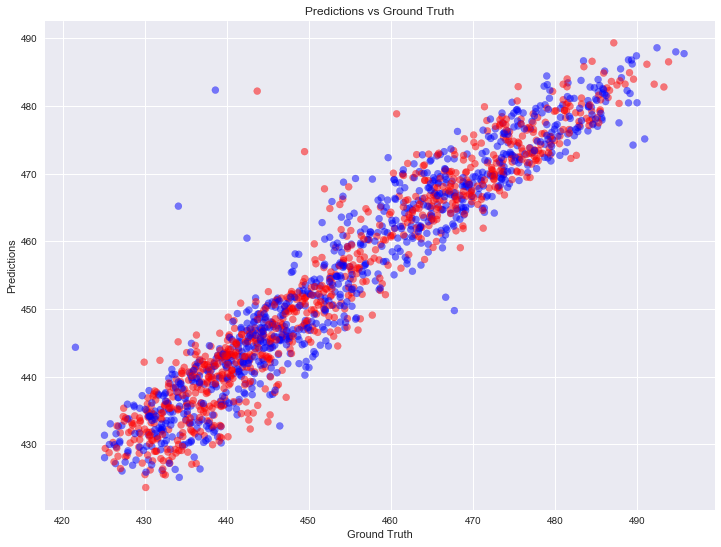

In [111]:
plt.figure(figsize=(12,9))
plt.scatter(y_test, predictionsLM, color=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.show()

In [112]:
#Make Predictions
predictionsBR = modelBR.predict(X_test)
predRsquared = r2_score(y_test,predictionsRF)
rmse = sqrt(mean_squared_error(y_test, predictionsRF))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.920
RMSE: 4.767


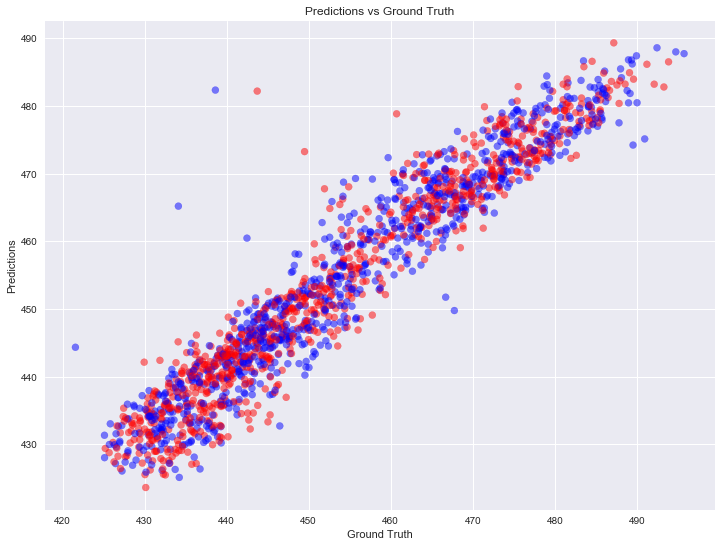

In [113]:
plt.figure(figsize=(12,9))
plt.scatter(y_test, predictionsBR, color=['blue','red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.show()

None of the regression models fit the data very well. Across the board, there are agreements and disagreements.